<a href="https://colab.research.google.com/github/Fatai-soliu/bank-telemarketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Client Subscription to Term Deposits Using Machine Learning: A Comparative Analysis of KNN and Decision Tree Algorithm

This notebook focus on the analysis and

In [25]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
#Import the dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/bank.csv')

In [27]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [28]:
#Check the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The dataset contains 4521 records with 17 features containing both 7 numerical  and 10 categorical data. There are no missing values in this data.

In [29]:
data.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


`Age`: The minimum client age is 19 years and maximum is 87. Average age of the cient is 41.17

`Balance`:

`day`:

`duration`:

`campaign`:

`pdays`:

`previous`:



In [30]:
data.shape

(4521, 17)

In [31]:
## Check for missing data
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


There are no missing values in this dataset

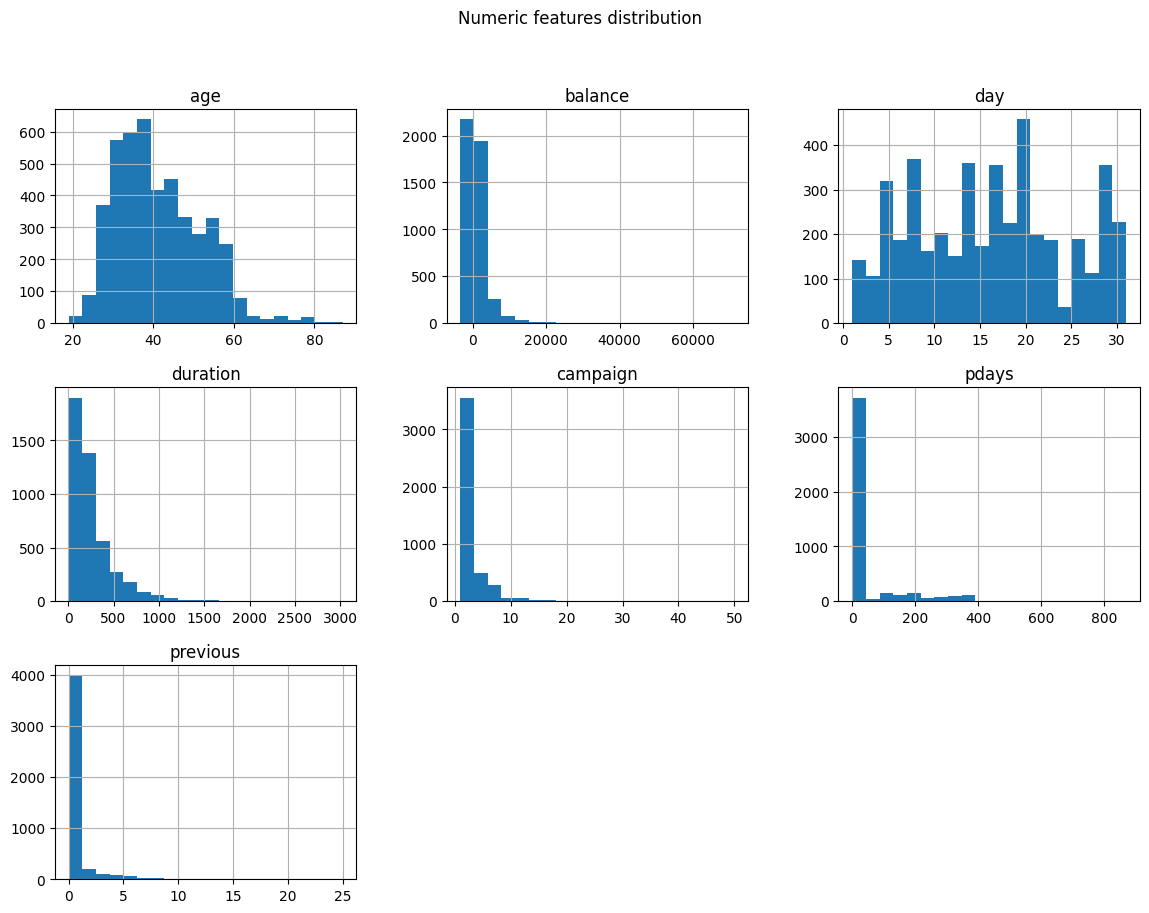

In [32]:
#Creating a histogram to visualise the data distribution for numeric columns

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

data[numeric_columns].hist(figsize=(14, 10), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()

Based on the histogram above, majority of the clients age fall between 29 years to 60 years

##Handling Outliers

To visualise and Identify outliers, boxplot were used on numerical columns `Age`, `balance`, `day`, `duration`, `campaign`, `pdays` and `previous`. These visualistions helps to identify the noises and distortion in the data



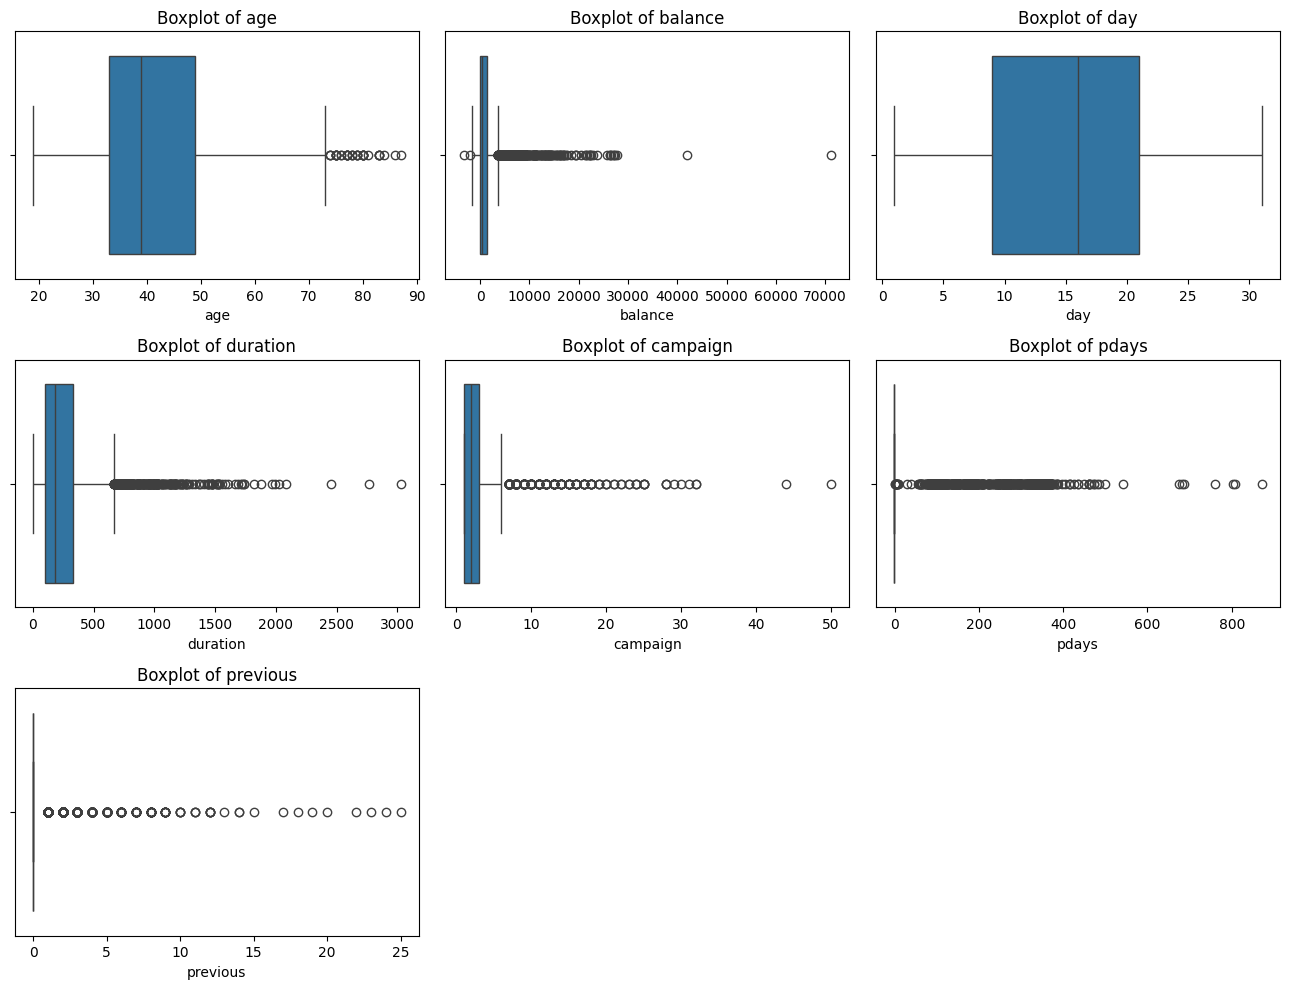

In [10]:
# Creating a boxplot for all numeric data in the dataset too spot outlier

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(13, 10))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

Majority of the numeric columns contain outlier, outliers are indicated by the point below or above the whiskers of the boxplot as seen in boxplot of `Age`, `balance`, `duration` and `campaign`.  

Similarly the values in pdays and previous have a small range and mostly the same, hence the absense of the box.

Outliers were investigated further to confirm if they are valid or are as a result of errors and then handled accordinly

The Outliers will be handled using 2 different methods.

1. IQR Method (for `age`, `day`, `duration`, `pdays`): This method is used to cap outliers while maintainin good pattern in the dataset. it works well on normally distributed dataset like the numeric columns above

2. 99th Percentile Capping (for `balance`, `campaign` and `previous`) : This method is used on numeric columns with high skewness (as found in most financial & marketing data) but valid data. This is to ensure data still retain natural distribution

In [36]:
#Handling outlier - Capping outliers using Interquartile Range (IQR) method

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return data

iqr_columns = ['age', 'day', 'duration', 'pdays']
for col in iqr_columns:
    data = cap_outliers_iqr(data, col)

print(data.head())

    age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no     1787      no   no   
1  33.0     services  married  secondary      no     4789     yes  yes   
2  35.0   management   single   tertiary      no     1350     yes   no   
3  30.0   management  married   tertiary      no     1476     yes  yes   
4  59.0  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct      79.0         1   -1.0         0  unknown  no  
1  cellular   11   may     220.0         1   -1.0         4  failure  no  
2  cellular   16   apr     185.0         1   -1.0         1  failure  no  
3   unknown    3   jun     199.0         4   -1.0         0  unknown  no  
4   unknown    5   may     226.0         1   -1.0         0  unknown  no  


In [37]:
#Handling outlier - Capping outliers using 99th percentile-based method

def cap_outliers_percentile(data, column):
    upper_bound = data[column].quantile(0.99)
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    return data

percentile_columns = ['balance', 'campaign', 'previous']
for col in percentile_columns:
    data = cap_outliers_percentile(data, col)

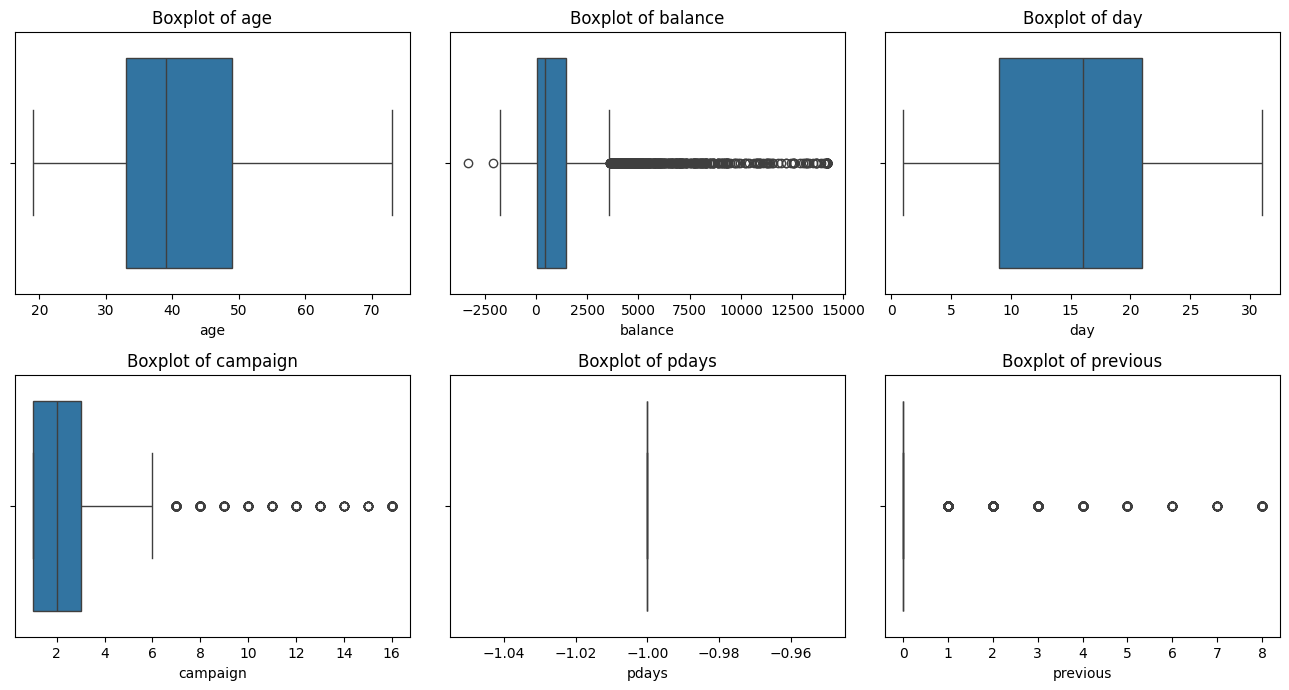

In [38]:
# Re-visualising the numeric columns after treating outliers

numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(13, 10))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

The dataset has now been cleaned, making it more reliable for further analysis. Removing the `duration` column ensures data integrity, while capping outliers helps prevent extreme values from distorting the analysis and model training.

In [39]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.0,4521.000000
mean,41.123203,1352.030878,15.915284,241.785667,2.725061,-1.0,0.503871
std,10.416974,2428.934930,8.247667,185.397346,2.626585,0.0,1.383866
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.0,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.0,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.0,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.0,0.000000
max,73.000000,14194.600000,31.000000,666.500000,16.000000,-1.0,8.000000


## Exploratory Data Analysis

This EDA stage will focus on understanding the feature better and selecting the best features that is suitable for model training. The EDA will include Univariate Descriptive analysis and Bivariate inferential analysis

In [11]:
# Checking the correlation between the numeric variables and the target column y

data['y'] = data['y'].map({'yes': 1, 'no': 0})

corr = data.corr(numeric_only=True)['y'].sort_values(ascending=False)
corr

,y
y,1.000000
duration,0.401118
previous,0.116714
pdays,0.104087
age,0.045092
balance,0.017905
day,-0.011244
campaign,-0.061147


Important note: duration, in seconds (numeric). this attribute highly affects the output target (e.g., if duration=0 then y='no'). and it can only be known after a call has already been performed and not before. By this time, y is obviously known as well. It also has the hightest positive correlation (0.401118) to the target variable compared to other **numeric **variable.

So to be able to build a realistic predictive model. This duration column needs to be dropped to prevent the model from overfitting

In [12]:
# Drop the duration column

data = data.drop(['duration'], axis=1)

## Univariate Descriptive Analysis

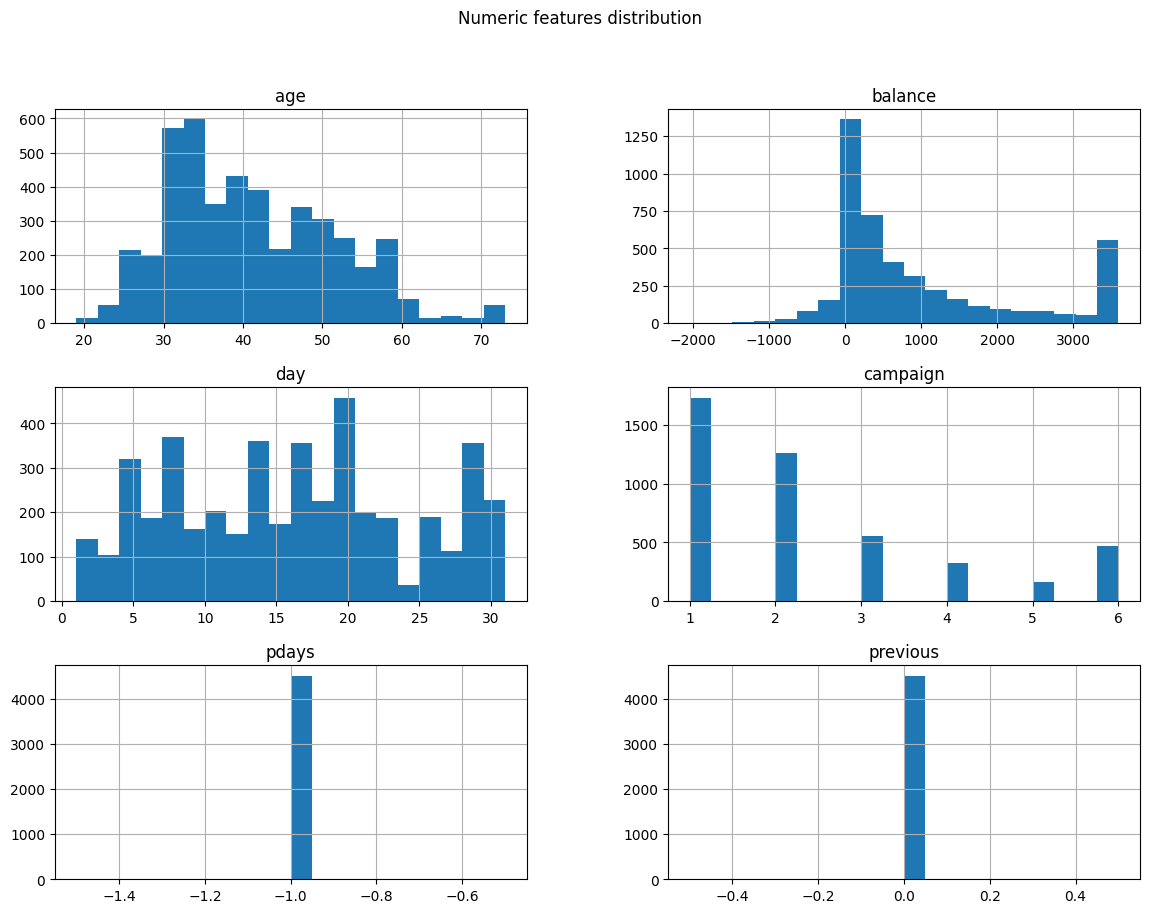

In [20]:
# Plotting histograms for numeric features

data[numeric_columns].hist(figsize=(14, 10), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()


In [23]:
data.describe()

,age,balance,day,campaign,pdays,previous,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.0,4521.0,4521.000000
mean,41.123203,973.493696,15.915284,2.412962,-1.0,0.0,0.115240
std,10.416974,1240.356566,8.247667,1.622028,0.0,0.0,0.319347
min,19.000000,-2047.500000,1.000000,1.000000,-1.0,0.0,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.0,0.0,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.0,0.0,0.000000
max,73.000000,3596.500000,31.000000,6.000000,-1.0,0.0,1.000000
